# Les réactions (likes , shares , comments)

## Imports

In [103]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from classes.Chart import Chart

SyntaxError: invalid syntax (<ipython-input-103-d5b1a1a71676>, line 4)

## Lecture du DataSet

In [ ]:
chart = Chart()

In [94]:
df = pd.read_csv("articles_data.csv", index_col='index')
df.head(3)

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
index,,,,,,,,,,,,,,
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/life-and-style/fash...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN


## l'impact de la longueur du titre sur  Les réactions

In [95]:
# Ajouter une colonne pour la taille des titre 
df['title_length']= df['title'].str.len() 

# calculer le total des commentaires shares et likes
df['reactions_count'] = df['engagement_reaction_count'] + df['engagement_comment_count'] + df['engagement_share_count'] 

# Nombre de reaction par longeur de titre
df[['title_length','reactions_count']].groupby('title_length').sum('reactions_count').sort_values(['title_length'], ascending=[False]).head(6)

,reactions_count
title_length,
250.0,1753.0
230.0,1.0
220.0,100.0
194.0,23.0
192.0,68.0
189.0,571.0


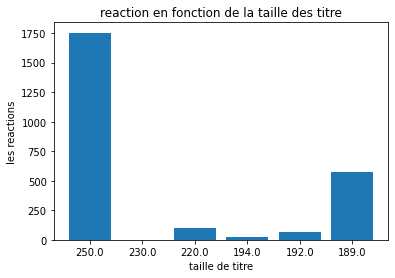

In [96]:
data = df[['title_length','reactions_count']].groupby('title_length').sum('reactions_count').sort_values(['title_length'], ascending=[False]).head(6)
title_length = list(data.index)
labels = []
labels.append
for i in title_length:
    labels.append(str(i))
reactions_count = list(data['reactions_count'])
chart.histGraph(labels, reactions_count, 'reaction en fonction de la taille des titre',
            'taille de titre', 'les reactions')


# l'impact de la longueur de l'article sur les réactions

In [97]:
# Ajouter une colonne pour la taille de l'article 
df['article_length']= df['content'].str.len() 

# Regrouper le nombre des reactions par rapport à la tailles des contenu
df[['article_length','reactions_count']].groupby('article_length').sum('reactions_count').sort_values(['article_length'], ascending=[False]).head(6)

,reactions_count
article_length,
276.0,0.0
275.0,36023.0
274.0,3514433.0
273.0,1882312.0
272.0,461553.0
271.0,104283.0


### Graphe reaction par taille d'article

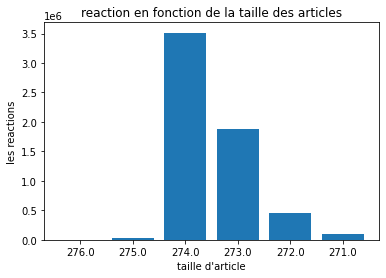

In [98]:
data = df[['article_length','reactions_count']].groupby('article_length').sum('reactions_count').sort_values(['article_length'], ascending=[False]).head(6)
article_length = list(data.index)
labels = []
labels.append
for i in article_length:
    labels.append(str(i))
reactions_count_art = list(data['reactions_count'])
chart.histGraph(labels, reactions_count_art, 'reaction en fonction de la taille des articles',
            'taille d\'article', 'les reactions')

# Le nombre d'article partagé liké et non liké


In [99]:
# Nombre d'article partagé 
nbArticleShared = len(df.query('engagement_share_count > 0'))

# Nombre d'article partagé qui sont liké
nbArticleSharedLiked = len(df.query('engagement_share_count > 0 \
                              and engagement_reaction_count > 0'))

# Nombre d'article partagé qui ne sont pas liké
nbTotalArticleSharedNonLike=len(df.query('engagement_share_count > 0 \
                                          and engagement_reaction_count <= 0'))

print("Le Nombre d'article partagé  : "+ str(nbArticleShared))
print("Le Nombre d'article partagé Liké  : "+ str(nbArticleSharedLiked))
print("Le Nombre d'article partagé non liké  : "+ str(nbTotalArticleSharedNonLike))


Le Nombre d'article partagé  : 7834
Le Nombre d'article partagé Liké  : 5513
Le Nombre d'article partagé non liké  : 2321


### Graphe partagés likés et non likés

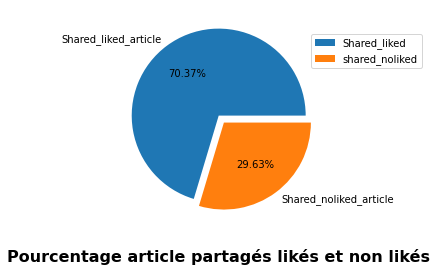

In [100]:
articleSahred = [nbArticleSharedLiked , nbTotalArticleSharedNonLike]
labels = ['Shared_liked_article', 'Shared_noliked_article']
explode = (0,1, 0)
plt.title('Pourcentage article partagés likés et non likés',fontdict={'fontweight': 600,'fontsize':16},y=-0.2)
plt.pie(articleSahred, labels=labels , autopct = '%1.2f%%' , explode = (0, 0.1))
plt.legend(('Shared_liked','shared_noliked'),bbox_to_anchor=(0.9, 0.9))
plt.savefig('pourcentageLikedNoliked',dpi=300)
plt.show()